<h1>Classifying European Money with pre-trained models  </h1>


<h2>Preparation</h2>


In [1]:
# Import PyTorch Modules will be used in the lab

import torch 
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import pandas
from torchvision import transforms
import torch.nn as nn
torch.manual_seed(0)

In [2]:
# Import Non-PyTorch Modules will be used in the lab

import time
from imageio import imread
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np

<h2 id="gen">Create Dataset Class and Object</h2>


In [3]:
# Url that contains CSV files

train_csv_file = "./resources/data/train_csv_file"
validation_csv_file = "./resources/data/validation_csv_file"

# Absolute path for finding the directory contains image datasets

train_data_dir = './resources/data/training_data_pytorch/'
validation_data_dir = './resources/data/validation_data_pytorch/'

In [4]:
# Create Dateaset Class

class Dataset(Dataset):
    
    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.data_name = pd.read_csv(csv_file)
        self.len = self.data_name.shape[0] 
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        img_name = self.data_dir + self.data_name.iloc[idx, 2]
        image = Image.open(img_name)
        y = self.data_name.iloc[idx, 3]
        if self.transform:
            image = self.transform(image)
        return image, y

In [5]:
# Construct the composed object for transforming the image

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
composed = transforms.Compose([transforms.Resize((224, 224))
                               , transforms.ToTensor()
                               , transforms.Normalize(mean, std)])

In [6]:
# Create the train dataset and validation dataset
train_dataset = Dataset(transform=composed
                        ,csv_file=train_csv_file
                        ,data_dir=train_data_dir)

validation_dataset = Dataset(transform=composed
                          ,csv_file=validation_csv_file
                          ,data_dir=validation_data_dir)

In [7]:
#Loading the pre-trained model resnet18
model = models.resnet18(pretrained = True)

#Set the parameter cannot be trained for the pre-trained model
for param in model.parameters():
    param.requires_grad = False

#Re-defining the last layer
model.fc = nn.Linear(512,7)

#Create the loss function
criterion = nn.CrossEntropyLoss()

#Create the data loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 15)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 10)

#Using the pre-definined optimizer
optimizer = torch.optim.Adam([parameters for parameters in model.parameters() if parameters.requires_grad], lr = 0.004)

#Training the model
N_EPOCHS = 20
loss_list = []
accuracy_list = []
correct = 0
n_test = len(validation_dataset)

for epochs in range(N_EPOCHS):
    loss_sublist =[]
    for x,y in train_loader:
        model.train()
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z,y)
        loss_sublist.append(loss.data.item())
        loss.backward()
        optimizer.step()
    loss_list.append(np.mean(loss_sublist))
    
    correct = 0
    for x_test, y_test in validation_loader:
        model.eval()
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / n_test
    accuracy_list.append(accuracy)
    print(f"The validation accuracy for epoch {epochs} is {accuracy:.4f}")


The validation accuracy for epoch 0 is 0.2571
The validation accuracy for epoch 1 is 0.1714
The validation accuracy for epoch 2 is 0.1714
The validation accuracy for epoch 3 is 0.6714
The validation accuracy for epoch 4 is 0.7857
The validation accuracy for epoch 5 is 0.7143
The validation accuracy for epoch 6 is 0.6429
The validation accuracy for epoch 7 is 0.8571
The validation accuracy for epoch 8 is 0.8571
The validation accuracy for epoch 9 is 0.9143
The validation accuracy for epoch 10 is 0.9286
The validation accuracy for epoch 11 is 0.9571
The validation accuracy for epoch 12 is 0.9714
The validation accuracy for epoch 13 is 0.9857
The validation accuracy for epoch 14 is 0.9714
The validation accuracy for epoch 15 is 0.9857
The validation accuracy for epoch 16 is 0.9857
The validation accuracy for epoch 17 is 0.9857
The validation accuracy for epoch 18 is 0.9857
The validation accuracy for epoch 19 is 0.9857


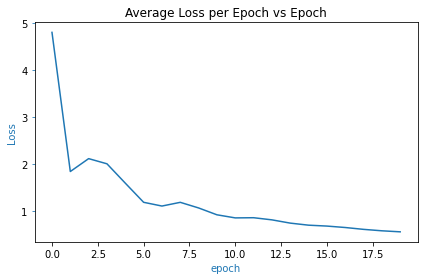

In [8]:
# Simple Plot  of the loss for training dataset
color = 'tab:blue'
plt.ylabel('Loss', color=color) 
plt.xlabel('epoch', color=color)
plt.plot(loss_list, color=color)
plt.tick_params(axis='y', color=color)
plt.title("Average Loss per Epoch vs Epoch")
plt.tight_layout()

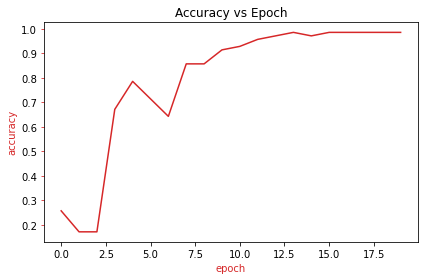

In [9]:
# Step 6: Plot the accuracy for valdiation dataset

# Type your code here
color = 'tab:red'
plt.ylabel('accuracy', color=color) 
plt.xlabel('epoch', color=color)
plt.plot( accuracy_list, color=color)
plt.tick_params(axis='y', color=color)
plt.title("Accuracy vs Epoch")
plt.tight_layout()

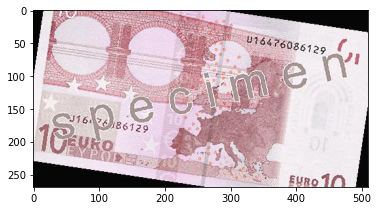

predicted: $10 (Correctly Classified)
-----------------------------------------


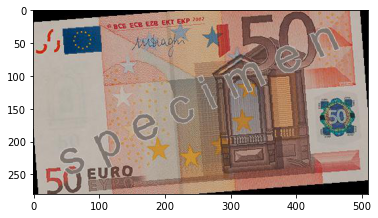

predicted: $50 (Correctly Classified)
-----------------------------------------


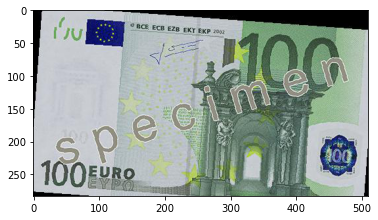

predicted: $100 (Correctly Classified)
-----------------------------------------


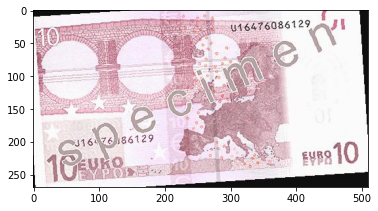

predicted: $10 (Correctly Classified)
-----------------------------------------


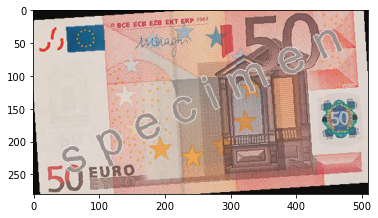

predicted: $50 (Correctly Classified)
-----------------------------------------


In [10]:
# Plot random images with predicted labels

look_up = {0: 'predicted: $5'
           , 1: 'predicted: $10'
           , 2: 'predicted: $20'
           , 3: 'predicted: $50'
           , 4: 'predicted: $100'
           , 5: 'predicted $200'
           , 6: 'predicted $500'}
#random.seed(0)
numbers = random.sample(range(70), 5)

# Type your code here
test_data = Dataset(csv_file=validation_csv_file, data_dir=validation_data_dir)
test_image_index = pd.read_csv(validation_csv_file)
#model.eval()
#print(numbers)


def plot_random_image(): #plot random images, display predicted denomination and whether correctly classified.
    for img in range(len(numbers)):  #go through each image and predict what it is, then verify if prediction was correct.
        image_class = test_image_index.iloc[numbers[img], 3]
        image_name = test_image_index.iloc[numbers[img], 2]
        image_path = validation_data_dir + image_name
        image = Image.open(image_path)
        display(image, image_name, image_class)

def prediction(image): #predicted the image index (what is the model's prediction of the image?)
    image_tensor = composed(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    output = model(image_tensor)
    index = output.data.cpu().numpy().argmax()
    return index

def result(image, image_class):     #is the predicted class the same as actual class?
    predicted_class = prediction(image)
    if image_class == predicted_class:
        print(look_up[predicted_class], "(Correctly Classified)")
    else:
        print(look_up[prediction(image)], "(Incorrectly Classified)")

def display(image, image_name, image_class):  #display image, predicted denomination, and if it was correct.
    #print("image_name:", image_name, " image class:", image_class)
    plt.imshow(image)
    plt.show()
    result(image, image_class)
    print("-----------------------------------------")

plot_random_image()

In [11]:
# Let's use densenet121 to see if it's more accurate.

model_des = models.densenet121(pretrained = True)
for param in model_des.parameters():
    param.requires_grad = False
model_des.classifier = nn.Linear(1024,7)
print(model_des)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [12]:
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 15)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 10)
optimizer = torch.optim.Adam([parameters for parameters in model_des.parameters() if parameters.requires_grad], lr = 0.004)

In [13]:
N_EPOCHS = 10
loss_list = []
accuracy_list = []
correct = 0
n_test = len(validation_dataset)

# Type your code here

for epochs in range(N_EPOCHS):
    loss_sublist =[]
    for x,y in train_loader:
        model_des.train()
        optimizer.zero_grad()
        z = model_des(x)
        loss = criterion(z,y)
        loss_sublist.append(loss.data.item())
        loss.backward()
        optimizer.step()
    loss_list.append(np.mean(loss_sublist))
    
    correct = 0
    for x_test, y_test in validation_loader:
        model_des.eval()
        z = model_des(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / n_test
    accuracy_list.append(accuracy)

In [14]:
print(accuracy_list[-1])

0.9571428571428572


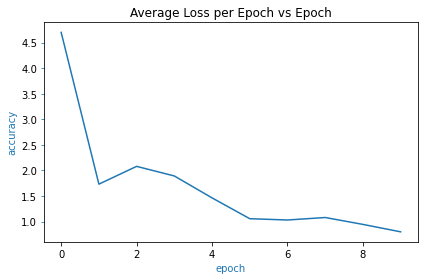

In [15]:
color = 'tab:blue'
plt.ylabel('accuracy', color=color) 
plt.xlabel('epoch', color=color)
plt.plot( loss_list, color=color)
plt.tick_params(axis='y', color=color)
plt.title("Average Loss per Epoch vs Epoch")
plt.tight_layout()

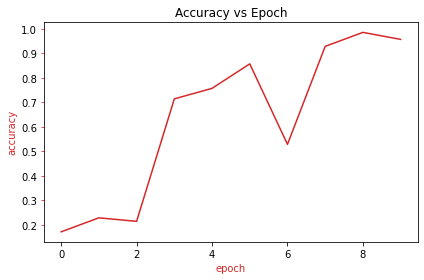

In [16]:
color = 'tab:red'
plt.ylabel('accuracy', color=color) 
plt.xlabel('epoch', color=color)
plt.plot( accuracy_list, color=color)
plt.tick_params(axis='y', color=color)
plt.title("Accuracy vs Epoch")
plt.tight_layout()

<h2 id="#save">Save the trained model</h2>


In [17]:
# Save the model
torch.save(model, "resnet18_pytorch.pt")
torch.save(model_des, "densenet121_pytorch.pt")